<a href="https://colab.research.google.com/github/Karthik190803/My_Projects/blob/main/Delhi_Air_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import warnings as w
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

w.filterwarnings('ignore')

In [27]:
data = pd.read_csv('/content/final_dataset.csv')

In [28]:
data

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116


In [29]:
data.sample(5)

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
563,18,7,2022,0,1,52.62,134.40,18.95,23.45,0.50,83.72,140
655,18,10,2022,0,2,41.46,236.88,4.77,11.00,0.83,9.93,200
1435,6,12,2024,0,5,55.49,222.89,50.54,58.59,0.96,43.59,184
172,22,6,2021,0,2,51.51,159.71,38.19,8.02,0.67,38.95,108
226,15,8,2021,1,7,37.18,123.48,20.61,8.16,0.43,68.21,119


In [30]:
data['Day'] = data['Date']

In [31]:
data.drop(columns='Date',inplace=True)

In [32]:
data['proper date'] = pd.to_datetime(data[['Year','Month','Day']])

data = data.sort_values('proper date')

In [33]:
data['Date'] = data['Day']
data.drop(columns=['Day','Date','Year','Month'],inplace=True)

In [34]:
data.sample(5)

,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,proper date
729,0,6,164.48,265.14,7.95,4.46,1.01,37.59,357,2022-12-31
1460,0,2,80.42,318.96,40.37,64.98,0.84,39.93,209,2024-12-31
1108,1,7,106.07,327.54,35.14,21.46,1.66,27.05,345,2024-01-14
216,0,4,48.55,86.49,24.25,12.05,0.54,21.78,93,2021-08-05
1264,0,2,119.43,341.42,20.47,37.67,0.83,50.85,201,2024-06-18


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Holidays_Count  1461 non-null   int64         
 1   Days            1461 non-null   int64         
 2   PM2.5           1461 non-null   float64       
 3   PM10            1461 non-null   float64       
 4   NO2             1461 non-null   float64       
 5   SO2             1461 non-null   float64       
 6   CO              1461 non-null   float64       
 7   Ozone           1461 non-null   float64       
 8   AQI             1461 non-null   int64         
 9   proper date     1461 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 114.3 KB


In [36]:
data.columns

Index(['Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone',
       'AQI', 'proper date'],
      dtype='object')

In [37]:
data.describe()

,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,proper date
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461
mean,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815,2023-01-01 00:00:00.000000256
min,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000,2021-01-01 00:00:00
25%,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000,2022-01-01 00:00:00
50%,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000,2023-01-01 00:00:00
75%,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000,2024-01-01 00:00:00
max,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000,2024-12-31 00:00:00
std,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076,NaN


In [38]:
data.nunique()

,0
Holidays_Count,2
Days,7
PM2.5,1391
PM10,1436
NO2,1308
SO2,1180
CO,240
Ozone,1264
AQI,403
proper date,1461


In [39]:

print("Missing values before handling:")
print(data.isnull().sum())

data.fillna(data.mean(), inplace=True)

print("\nMissing values after handling:")
print(data.isnull().sum())

Missing values before handling:
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
proper date       0
dtype: int64

Missing values after handling:
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
proper date       0
dtype: int64


In [40]:
pollutant_columns = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
data_viz = data[['proper date'] + pollutant_columns].copy()

data_viz = data_viz.set_index('proper date')

display(data_viz.head())

,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
proper date,,,,,,,
2021-01-01,408.80,442.42,160.61,12.95,2.77,43.19,462
2021-01-02,404.04,561.95,52.85,5.18,2.60,16.43,482
2021-01-03,225.07,239.04,170.95,10.93,1.40,44.29,263
2021-01-04,89.55,132.08,153.98,10.42,1.01,49.19,207
2021-01-05,54.06,55.54,122.66,9.70,0.64,48.88,149


from matplotlib import pyplot as plt
_df_0['PM2.5'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PM10'].plot(kind='hist', bins=20, title='PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['NO2'].plot(kind='hist', bins=20, title='NO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SO2'].plot(kind='hist', bins=20, title='SO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PM2.5', y='PM10', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PM10', y='NO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='NO2', y='SO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SO2', y='CO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PM2.5'].plot(kind='line', figsize=(8, 4), title='PM2.5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['PM10'].plot(kind='line', figsize=(8, 4), title='PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['NO2'].plot(kind='line', figsize=(8, 4), title='NO2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['SO2'].plot(kind='line', figsize=(8, 4), title='SO2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['PM2.5'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['PM10'].plot(kind='hist', bins=20, title='PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['NO2'].plot(kind='hist', bins=20, title='NO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['SO2'].plot(kind='hist', bins=20, title='SO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='PM2.5', y='PM10', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='PM10', y='NO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='NO2', y='SO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='SO2', y='CO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['proper date']
  ys = series['PM2.5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('proper date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('proper date')
_ = plt.ylabel('PM2.5')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['proper date']
  ys = series['PM10']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('proper date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('proper date')
_ = plt.ylabel('PM10')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['proper date']
  ys = series['NO2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('proper date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('proper date')
_ = plt.ylabel('NO2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['proper date']
  ys = series['SO2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('proper date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('proper date')
_ = plt.ylabel('SO2')

from matplotlib import pyplot as plt
_df_24['PM2.5'].plot(kind='line', figsize=(8, 4), title='PM2.5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['PM10'].plot(kind='line', figsize=(8, 4), title='PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['NO2'].plot(kind='line', figsize=(8, 4), title='NO2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['SO2'].plot(kind='line', figsize=(8, 4), title='SO2')
plt.gca().spines[['top', 'right']].set_visible(False)

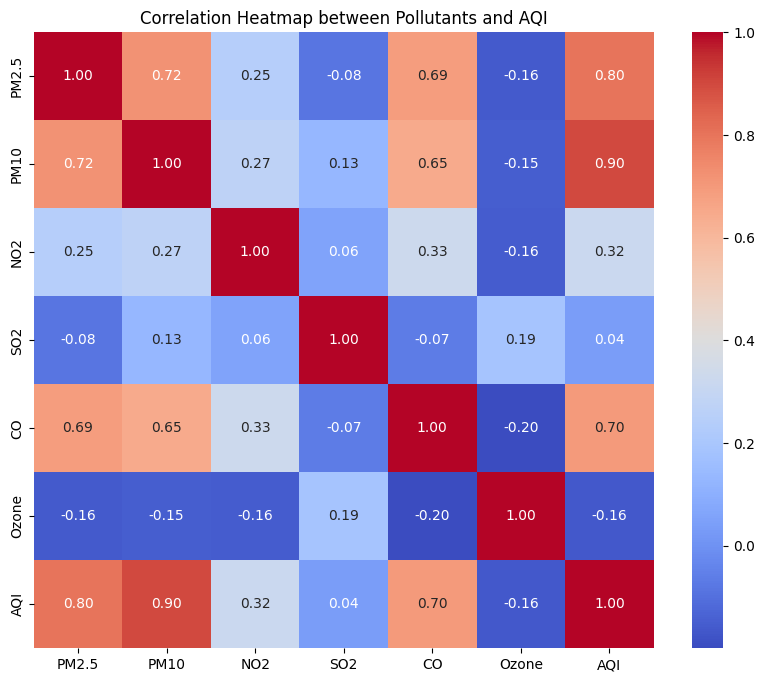

In [41]:
correlation_matrix = data_viz.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Pollutants and AQI')
plt.show()

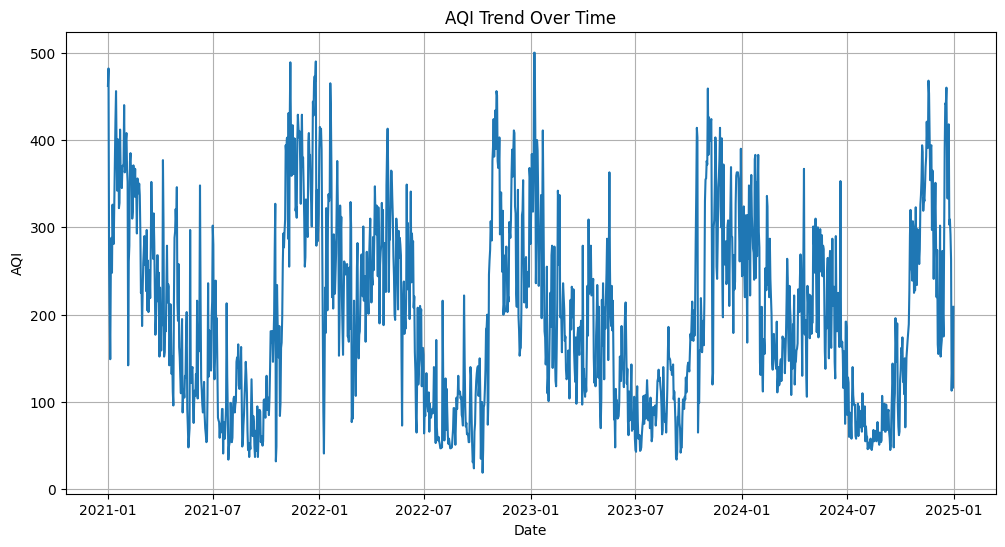

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(data_viz.index, data_viz['AQI'])
plt.title('AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()